## In this notebook we are going to Predict the Growth of Apple Stock using Linear Regression Model and CRISP-DM.

In [28]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data Understanding

The data is already processed to price-split values so it is easy to analysis but we are creating new tables to optimize our model

In [29]:
#importing Price Split Data
data = pd.read_csv('prices-split-adjusted.csv')

In [30]:
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [31]:
#checking data for null values
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

#### There are no null values in the Data table we are going to create

# Data Preprocessing

Creating Table for a specific Stock

In [32]:
#Initializing the Dataset for the Stock to be Analysized
data = data.loc[(data['symbol'] == 'AAPL')]
data = data.drop(columns=['symbol'])
data = data[['date', 'open', 'close', 'low', 'volume', 'high']]
data

,date,open,close,low,volume,high
254,2010-01-04,30.490000,30.572857,30.340000,123432400.0,30.642857
721,2010-01-05,30.657143,30.625713,30.464285,150476200.0,30.798571
1189,2010-01-06,30.625713,30.138571,30.107143,138040000.0,30.747143
1657,2010-01-07,30.250000,30.082857,29.864286,119282800.0,30.285715
2125,2010-01-08,30.042856,30.282858,29.865715,111902700.0,30.285715
...,...,...,...,...,...,...
848767,2016-12-23,115.589996,116.519997,115.589996,14249500.0,116.519997
849267,2016-12-27,116.519997,117.260002,116.489998,18296900.0,117.800003
849767,2016-12-28,117.519997,116.760002,116.199997,20905900.0,118.019997
850267,2016-12-29,116.449997,116.730003,116.400002,15039500.0,117.110001


In [33]:
#Number of rows and columns we are working with
data.shape

(1762, 6)

Ploting the closing price of the Stock

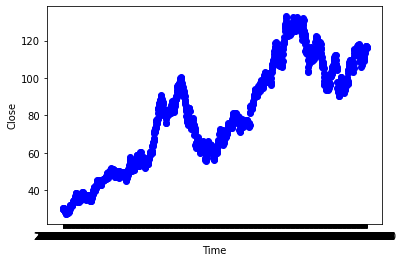

In [34]:
plt.scatter(data.date, data.close, color='blue')
plt.xlabel("Time")
plt.ylabel("Close")
plt.show()

### Here we can see that the Stock is growing in Long-Term with multiple medium downfalls 
So it is good for Long-term investing

In [35]:
#For plotting against time
data['date'] = pd.to_datetime(data.date)

<AxesSubplot:>

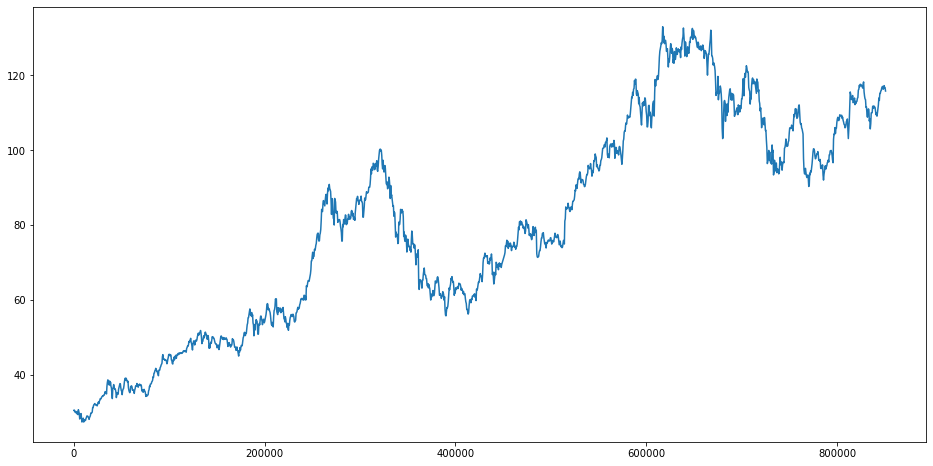

In [36]:
#Plot for close values on each date
data['close'].plot(figsize=(16, 8))

# Linear Regression

Here we are going to use LR to make simple prediction of the stock value change. We are checking for accuracy on a particular Stock.

In [37]:
x1 = data[['open', 'high', 'low', 'volume']]
y1 = data['close']

In [38]:
#Making test and train datasets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state = 0)

In [39]:
x1_train.shape

(1321, 4)

In [40]:
x1_test.shape

(441, 4)

In [41]:
#Initailizing LinearRegression
regression = LinearRegression()

In [42]:
regression.fit(x1_train, y1_train)

LinearRegression()

In [43]:
print(regression.coef_)

[-6.57250881e-01  8.33100712e-01  8.24296617e-01  3.19056892e-10]


In [44]:
print(regression.intercept_)

-0.017245251217801183


In [45]:
predicted = regression.predict(x1_test)

In [46]:
#Predictions for Stock values
print(x1_test)

              open        high         low       volume
554866  100.440002  101.089996   99.949997   52699000.0
313912   97.141426   97.267143   96.220001  106752100.0
193592   52.072857   52.125713   50.727142  133828800.0
262212   86.105713   87.092857   85.915718  161010500.0
642920  124.769997  126.080002  124.019997   43940900.0
...            ...         ...         ...          ...
435361   70.285713   70.421425   69.500000   68074300.0
45198    33.259998   34.928570   33.049999  305972800.0
361577   65.714287   66.532860   64.321426  365213100.0
83656    39.669998   39.708572   39.097141  158619300.0
50826    35.924286   35.985714   34.641430  213657500.0

[441 rows x 4 columns]


In [47]:
predicted.shape

(441,)

# Evaluation of the model

Making table for Actual price and Predicted Price

In [48]:
dframe = pd.DataFrame(y1_test, predicted)
dfr = pd.DataFrame({'Actual_Price':y1_test, 'Predicted_Price':predicted})
print(dfr)

        Actual_Price  Predicted_Price
554866    100.570000       100.591881
313912     96.525711        96.517675
193592     50.919998        51.040703
262212     86.071426        86.818228
642920    125.260002       125.258187
...              ...              ...
435361     69.602859        69.765881
45198      34.617142        34.562233
361577     64.357140        65.357013
83656      39.338570        39.269103
50826      34.742859        34.974192

[441 rows x 2 columns]


In [49]:
#Actual values vs Predicted Values 
dfr.head(10)

,Actual_Price,Predicted_Price
554866,100.570000,100.591881
313912,96.525711,96.517675
193592,50.919998,51.040703
262212,86.071426,86.818228
642920,125.260002,125.258187
632546,125.599998,125.595923
513706,75.957146,75.688617
473526,78.431427,78.611226
813267,111.769997,112.239228
850767,115.820000,116.112156


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [51]:
#Regrssion Score Analysis
regression.score(x1_test, y1_test)

0.9997097933702983

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, predicted)))

Mean Absolute Error: 0.30608656696067815
Mean Squared Error: 0.22821232374110115
Root Mean Squared Error: 0.4777157352873162


In [53]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  100.03086789989214


# Deploying the model by visualization

### Plotting Acutal Close values vs Predicted Values in LR Model

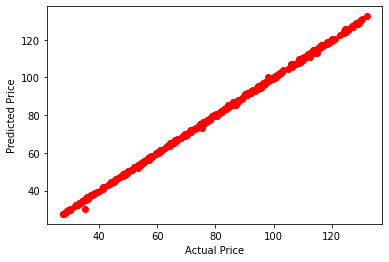

In [54]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.show()

We can see that using simple Linear Regression on a Scalar and Linear entity as Stock Price over a period of time gives a simple and straight line. Stating that the stock is growing over time. So now we are some what confident in investing in this stock. To better understand next we are using LSTM model.